# Começando


In [31]:
import matplotlib.pyplot as plt
import pandas as pd 
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Pegando dados

In [32]:
dados_csv = pd.read_csv("population_by_country_2020.csv")
y_csv, x1_csv, x2_csv = dados_csv["Population (2020)"], dados_csv["Density (P/Km²)"], dados_csv["Land Area (Km²)"]

x1, x2, y = [], [], []

for i in range(x1_csv.shape[0]):
    x1.append(x1_csv[i])
    x2.append(x2_csv[i])
    y.append(y_csv[i])

### Gráfico do Conjunto de Dados X1Y

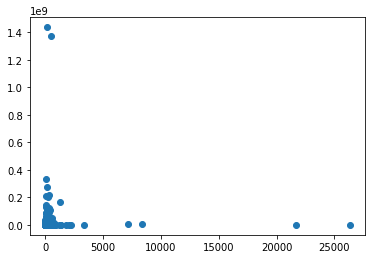

In [33]:
plt.scatter(x1,y)

### Gráfico do Conjunto de Dados X2Y

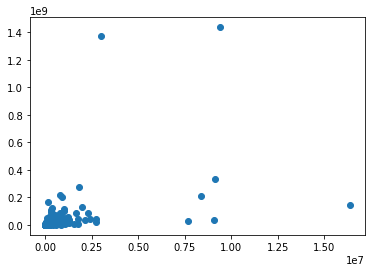

In [34]:
plt.scatter(x2,y)

### Função de Coeficiente de Correlação

In [35]:
def CoeficienteCorrelacao(x, y):
  Sx = 0
  Sy = 0
  Sxy = 0
  Sxx = 0
  Syy = 0
  x_x_med = []
  y_y_med = []
  xx = []
  yy = []
  xy = []

  for i in range(len(x)):
      Sx += x[i]
      Sy += y[i]
  x_med = Sx/len(x)
  y_med = Sy/len(y)

  for i in range(len(x)):
      x_x_med.append((x[i] - x_med))
      y_y_med.append((y[i] - y_med))

  for i in range(len(x)):
      xx.append(x_x_med[i]**2)
      yy.append(y_y_med[i]**2)
      xy.append(y_y_med[i]*x_x_med[i])

  # Calculo do Rho
  for i in range(len(x)):
      Sxy += xy[i]
      Sxx += xx[i]
      Syy += yy[i]
  
  return { 'rho': Sxy / math.sqrt(Sxx*Syy), 'sxx': Sxx, 'sxy': Sxy, 'xMed': x_med, 'yMed': y_med} # RHO


### Correlação entre X1 e Y
(Lembrando que esse valor é esperado entre -1 e 1)

In [36]:
x1_rho = CoeficienteCorrelacao(x1,y)['rho']
print(f"O valor da correlação entre X1 e Y é: {x1_rho}")

O valor da correlação entre X1 e Y é: -0.025395360437054575


### Correlação entre X2 e Y

In [37]:
x2_rho = CoeficienteCorrelacao(x2,y)['rho']
print(f"O valor da correlação entre X1 e Y é: {x2_rho}")

O valor da correlação entre X1 e Y é: 0.4557444362371723


### Coeficiente de Determinação entre X1 e Y
Valor esperado entre 0 e 1 (Que diz quantos % da variabilidade de y é explicada por xi)

In [38]:
coefDeterminationX1 = math.pow(x1_rho, 2)
print(f"O valor do coeficiente da determinação entre X1 e Y é: {coefDeterminationX1}")

O valor do coeficiente da determinação entre X1 e Y é: 0.0006449243317279168


### Coeficiente de Determinação entre X2 e Y

In [39]:
coefDeterminationX2 = math.pow(x2_rho, 2)
print(f"O valor do coeficiente da determinação entre X1 e Y é: {coefDeterminationX2}")

O valor do coeficiente da determinação entre X1 e Y é: 0.20770299116113802


### Função para calcular Beta Chápeu

In [40]:
def CalculaBeta(x, y):
  matrix = np.array(x)
  y = np.array(y)

  transposta = np.transpose(matrix)
  mult = np.dot(transposta,matrix)
  inversa = np.linalg.inv(mult)
  mult2 = np.dot(inversa, transposta)

  return np.dot(mult2,y) #Beta

### Valores estimados de Beta Chápeu

In [41]:
base = np.zeros(len(x1))
for i in range(len(base)):
    base[i] = 1

x = []

for i in range(len(x1)):
    x.append([base[i], x1[i], x2[i]])

betas = CalculaBeta(x, y)

print("Os Valores de Beta são:\n")

for beta in betas:
    print(f"\t{beta}", end="")

Os Valores de Beta são:

	12884326.827237627	80.55607498768511	36.443960153661074

### Plotando o hiperplano
- Deixo aqui um arquivo .py como gráfico pois esse seria interessante ver em 3d e poder mexer porém no arquivo .ipynb isso não é possível


C:\Users\55229\AppData\Local\Temp\ipykernel_4444\1085466397.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  grafico = plothiper.gca(projection='3d')


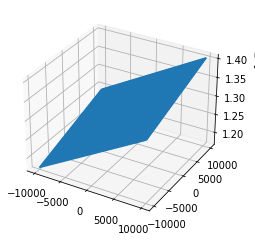

In [49]:
plothiper = plt.figure()
grafico = plothiper.gca(projection='3d')

x1g = np.linspace(-10000,10000,100)
x2g = np.linspace(-10000,10000,100)

XG, YG = np.meshgrid(x1g, x2g)
Z = betas[0] + XG*betas[1] + YG*betas[2]

# grafico = plt.axes(projection='3d')

grafico.plot_wireframe(XG,YG,Z)
plt.show()

In [43]:
yChapeu = []

for i in range(x1_csv.shape[0]):
    yChapeu.append(betas[0] + betas[1]*x1[i] + betas[2]*x2[i])

print(yChapeu)

[355040239.50487334, 121276522.73529547, 346255436.83473957, 78917275.69012856, 41001366.42401335, 317490061.8478331, 46094598.08933474, 17730140.55529911, 609723049.5536, 83734879.86889626, 26198107.679076266, 49337550.92952228, 23780467.06185022, 49170764.23792328, 24209800.15962945, 95507828.93659447, 40941553.048548445, 72239327.05138174, 25606567.036394775, 31514217.812414847, 21723850.36428439, 32849058.49001936, 23620547.818282954, 45171783.988374785, 57098077.69771673, 36699487.710246846, 33633614.58014113, 16470226.124496602, 53322606.19717402, 31070146.422932614, 20184641.846712824, 112621517.59343515, 99685814.49296813, 77211679.71041149, 34003083.52908064, 28720159.31614956, 36681964.01765606, 24054549.698391728, 344288165.1484561, 29155952.39804054, 91228832.4271611, 28393951.406529076, 59534690.28187348, 58321106.40875656, 24865964.987146754, 41546350.45587313, 21187821.70287498, 32130155.609765373, 18124921.39848744, 45032299.67517398, 34091107.316436276, 30116262.371674

In [44]:
residuos = []

for i in range(x1_csv.shape[0]):
    residuos.append(y[i]-yChapeu[i])

print(residuos)

[1083167001.4951267, 1255957000.2647045, -15644866.834739566, 194014437.30987144, 178991533.57598665, -105236911.8478331, 158957508.91066527, 146624035.4447009, -463801039.55359995, 44920709.13110374, 100354657.32092373, 65019943.07047772, 85499875.93814978, 52759511.76207672, 72950326.84037055, -6535147.936594471, 43211696.951451555, 11532259.948618263, 58123655.963605225, 38250707.18758515, 46090247.63571561, 32395569.50998064, 36858876.181717046, 14196529.011625215, 2056724.3022832721, 17636460.289753154, 19887501.419858873, 34790168.8755034, -2550728.19717402, 15681028.577067386, 25242995.153287176, -67510288.59343515, -56000196.49296813, -33579466.71041149, 9782038.470919363, 11311466.683850441, 2060946.982343942, 13800275.301608272, -306613395.1484561, 7664760.6019594595, -56527455.4271611, 4974907.593470924, -26657704.28187348, -25676323.40875656, 7414645.012853246, -10478988.455873132, 9748553.29712502, -2442941.609765373, 10902425.601512559, -16580471.675173983, -6552001.31643

## g) Faça o histograma dos erros de estimação encontrados no item anterior. Comente sobre sua característica.

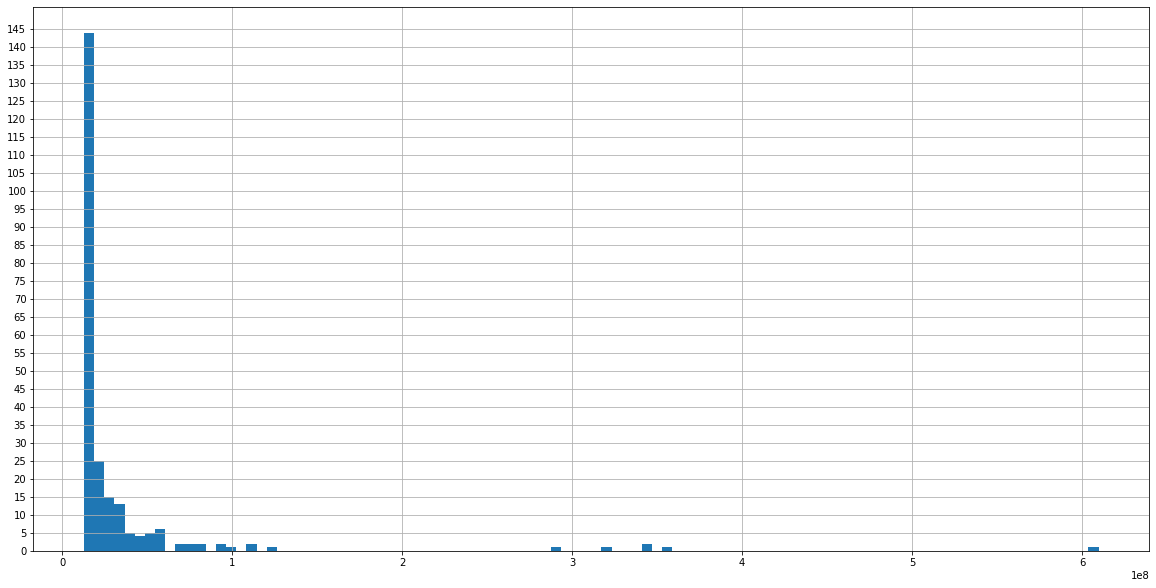

In [51]:
fig, axe = plt.subplots(figsize=(20,10))
plt.hist(yChapeu, bins=100)
plt.grid(True)
# plt.xticks(np.arange(-400000, 900000, 100000))
plt.yticks(np.arange(0, 150, 5))
plt.show()